# Finding 90th percentile for each column

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', None)         # Let Pandas decide column widths automatically

In [2]:
df = pd.read_csv('resid.all.csv')

group_col = df.columns[-1]
df = df.rename(columns={group_col: 'dementia'})

p90 = df.quantile(0.90)
p90

Left.Cerebellum.Cortex                   1.177867
Left.Thalamus.Proper                     1.152246
Left.Caudate                             1.215639
Left.Putamen                             1.235856
Left.Pallidum                            1.245390
Brain.Stem                               1.112796
Left.Hippocampus                         1.288295
Left.Amygdala                            1.256684
Left.Accumbens.area                      1.149769
Left.VentralDC                           1.220281
Right.Cerebellum.Cortex                  1.128571
Right.Thalamus.Proper                    1.167931
Right.Caudate                            1.278124
Right.Putamen                            1.297563
Right.Pallidum                           1.242553
Right.Hippocampus                        1.321528
Right.Amygdala                           1.321285
Right.Accumbens.area                     1.169082
Right.VentralDC                          1.184762
grayVolume.L.bankssts                    1.169417


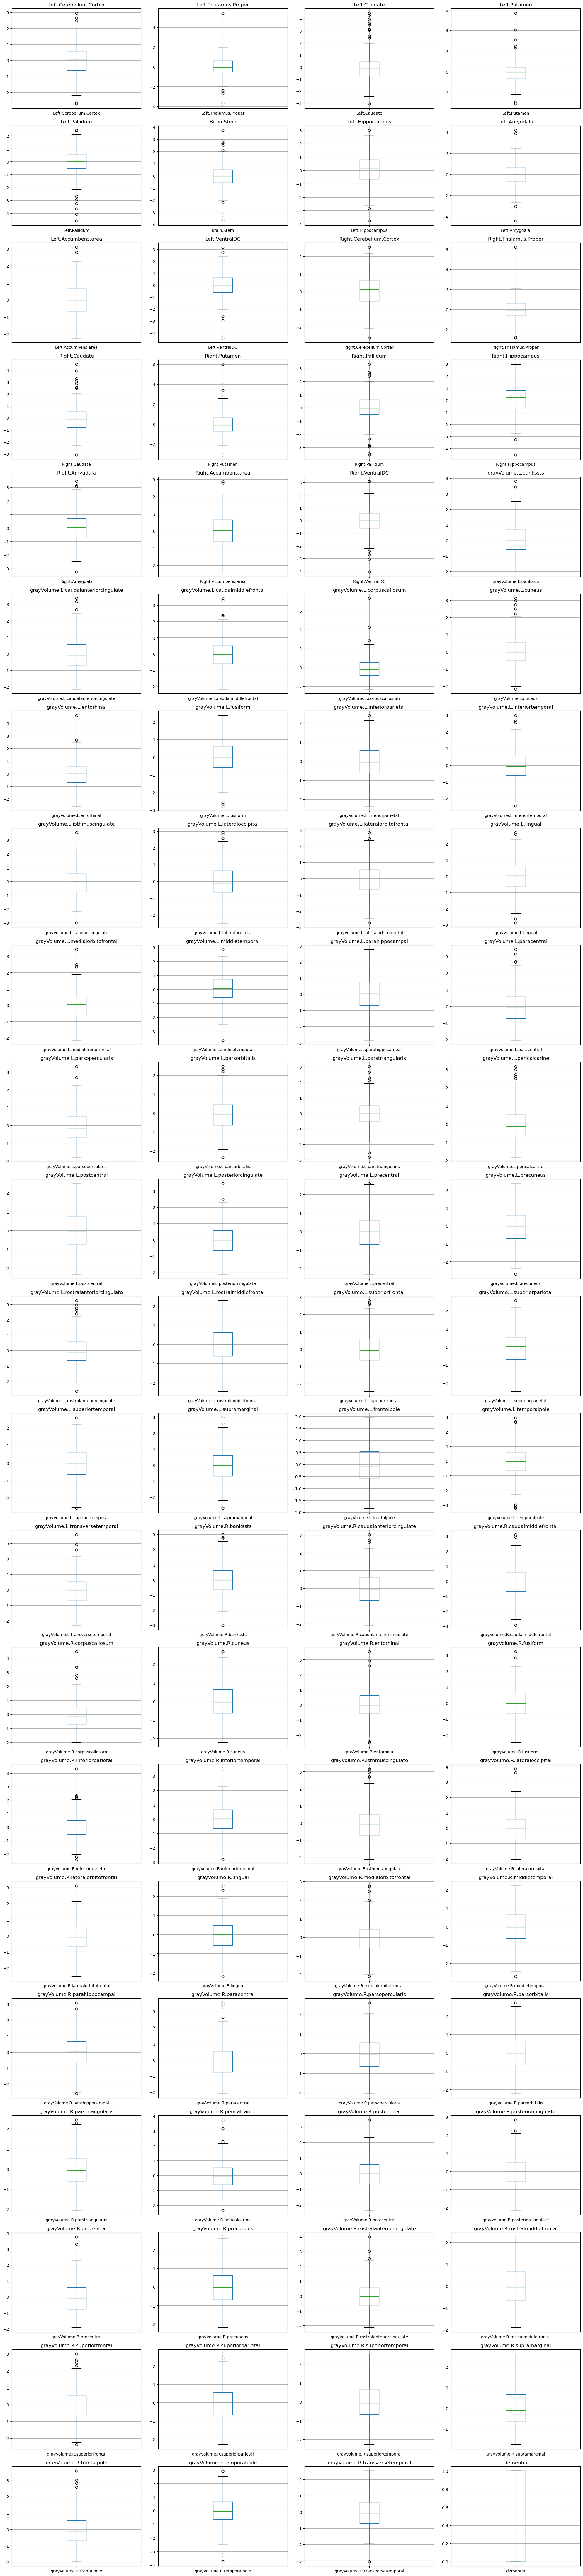

In [3]:
num_cols = len(df.columns)
cols_per_row = 4  
rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 4 * rows))

axes = axes.flatten() if rows > 1 else axes

for i, col in enumerate(df.columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

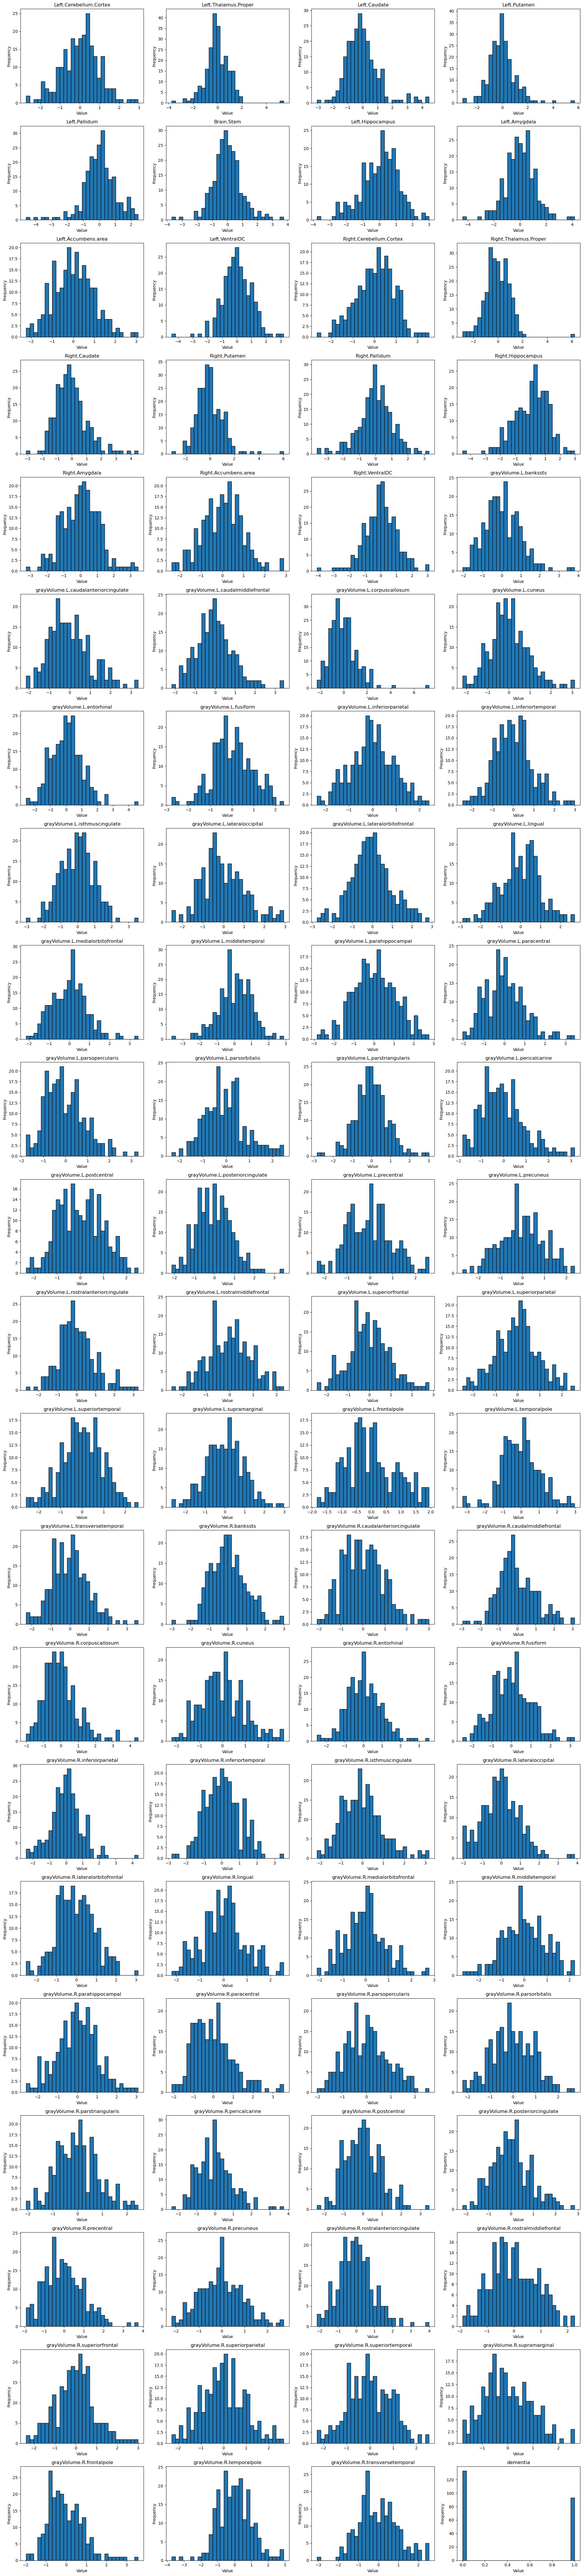

In [4]:
n_cols = 4  
n_rows = math.ceil(len(df.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Loop through each column and plot its histogram
for i, col in enumerate(df.columns):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [ ]:
results = {}
for col in df.columns[:-1]:
    group0 = df[df['dementia'] == 0][col]
    group1 = df[df['dementia'] == 1][col]
    
    t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
    
    results[col] = {'t_statistic': t_stat, 'p_value': p_val}
    
    print(f"{col}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")



Left.Cerebellum.Cortex: t-statistic = 1.4252, p-value = 0.1559
Left.Thalamus.Proper: t-statistic = 2.7889, p-value = 0.0059
Left.Caudate: t-statistic = -1.7724, p-value = 0.0781
Left.Putamen: t-statistic = 2.1334, p-value = 0.0340
Left.Pallidum: t-statistic = -0.3888, p-value = 0.6978
Brain.Stem: t-statistic = 0.2288, p-value = 0.8193
Left.Hippocampus: t-statistic = 7.7940, p-value = 0.0000
Left.Amygdala: t-statistic = 6.5001, p-value = 0.0000
Left.Accumbens.area: t-statistic = 2.9729, p-value = 0.0033
Left.VentralDC: t-statistic = 2.9952, p-value = 0.0031
Right.Cerebellum.Cortex: t-statistic = 1.5322, p-value = 0.1272
Right.Thalamus.Proper: t-statistic = 2.2989, p-value = 0.0227
Right.Caudate: t-statistic = -1.2972, p-value = 0.1963
Right.Putamen: t-statistic = 0.4964, p-value = 0.6202
Right.Pallidum: t-statistic = -0.2025, p-value = 0.8398
Right.Hippocampus: t-statistic = 8.4214, p-value = 0.0000
Right.Amygdala: t-statistic = 7.2155, p-value = 0.0000
Right.Accumbens.area: t-statistic